In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
url = "https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/marketing_campaign.csv"
df = pd.read_csv(url)


#Descriptive Analysis

In [5]:
#Basic Structure:
#Print the first few rows of the dataset to get an overview of the data.
print(df.head())

   Campaign_ID              Company Campaign_Type Target_Audience Duration  \
0            1             TechCorp         Email     Women 25-34  30 days   
1            2  Innovate Industries    Influencer     Women 35-44  45 days   
2            3       NexGen Systems  Social Media     Women 25-34  45 days   
3            4  Innovate Industries         Email     Women 25-34  45 days   
4            5  Data Tech Solutions    Influencer       Men 25-34  30 days   

  Channel_Used  Conversion_Rate  Acquisition_Cost     ROI          Location  \
0     Facebook         5.294194              9344   62.94           Houston   
1   Google Ads         3.326375              8783   10.67  Washington, D.C.   
2    Instagram         4.056375              9111   73.20             Miami   
3    Instagram         4.496375              7420   60.92           Seattle   
4   Google Ads         4.405930              2146  138.82           Chicago   

  Language  Clicks  Impressions  Engagement_Score  Custo

In [6]:
#Obtain the number of rows and columns in the dataset.
print(df.shape)

(22029, 16)


In [7]:
#Get a concise summary of the dataset, including the data types and non-null values.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22029 entries, 0 to 22028
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Campaign_ID       22029 non-null  int64  
 1   Company           22029 non-null  object 
 2   Campaign_Type     22029 non-null  object 
 3   Target_Audience   22029 non-null  object 
 4   Duration          22029 non-null  object 
 5   Channel_Used      22029 non-null  object 
 6   Conversion_Rate   22029 non-null  float64
 7   Acquisition_Cost  22029 non-null  int64  
 8   ROI               22029 non-null  float64
 9   Location          22029 non-null  object 
 10  Language          22029 non-null  object 
 11  Clicks            22029 non-null  int64  
 12  Impressions       22029 non-null  int64  
 13  Engagement_Score  22029 non-null  int64  
 14  Customer_Segment  22029 non-null  object 
 15  Date              22029 non-null  object 
dtypes: float64(2), int64(5), object(9)
memor

In [8]:
#Generate descriptive statistics for numerical columns.
print(df.describe())

        Campaign_ID  Conversion_Rate  Acquisition_Cost           ROI  \
count  22029.000000     22029.000000      22029.000000  22029.000000   
mean   11015.000000         4.757232       5522.740842    182.863648   
std     6359.368876         0.960393       2597.666260    301.619721   
min        1.000000         2.015723       1000.000000    -98.300000   
25%     5508.000000         4.130705       3286.000000     -4.080000   
50%    11015.000000         4.761527       5525.000000     93.650000   
75%    16522.000000         5.429335       7766.000000    247.310000   
max    22029.000000         7.469907       9999.000000   3109.790000   

             Clicks   Impressions  Engagement_Score  
count  22029.000000  22029.000000      22029.000000  
mean    2223.807572  50610.402787          6.582323  
std     1394.166380  28542.979123          1.458804  
min       30.000000   1001.000000          4.000000  
25%     1067.000000  25804.000000          5.000000  
50%     2088.000000  50858.

In [10]:
#Data Exploration:
#Print the number of unique Campaign_ID values in the dataset.
print("Unique Campaign_IDs:", df['Campaign_ID'].nunique())

Unique Campaign_IDs: 22029


In [11]:
#List the unique values of the Location and Customer_Segment columns.
print("Locations:", df['Location'].unique())
print("Customer Segments:", df['Customer_Segment'].unique())

Locations: ['Houston' 'Washington, D.C.' 'Miami' 'Seattle' 'Chicago' 'Los Angeles'
 'Atlanta' 'Dallas' 'New York' 'San Francisco']
Customer Segments: ['Tech Enthusiasts' 'Foodies' 'Fashionistas' 'Outdoor Adventurers'
 'Health & Wellness']


In [12]:
#Count the occurrences of each category in the Campaign_Type and Channel_Used and columns.
print(df['Campaign_Type'].value_counts())
print(df['Channel_Used'].value_counts())

Campaign_Type
Display         4450
Search          4441
Social Media    4412
Email           4388
Influencer      4338
Name: count, dtype: int64
Channel_Used
Facebook      3742
Google Ads    3694
Website       3688
Instagram     3649
YouTube       3632
Email         3624
Name: count, dtype: int64


#Exploratory Data Analysis (EDA) and Visualization
Campaign Performance:

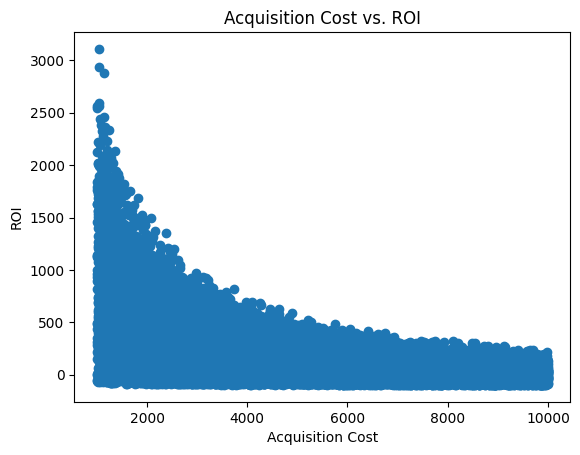

In [14]:
#Plot a scatter plot to visualize the relationship between Acquisition_Cost and ROI.
import matplotlib.pyplot as plt
plt.scatter(df['Acquisition_Cost'], df['ROI'])
plt.xlabel('Acquisition Cost')
plt.ylabel('ROI')
plt.title('Acquisition Cost vs. ROI')
plt.show()

<Axes: xlabel='Channel_Used', ylabel='Conversion_Rate'>

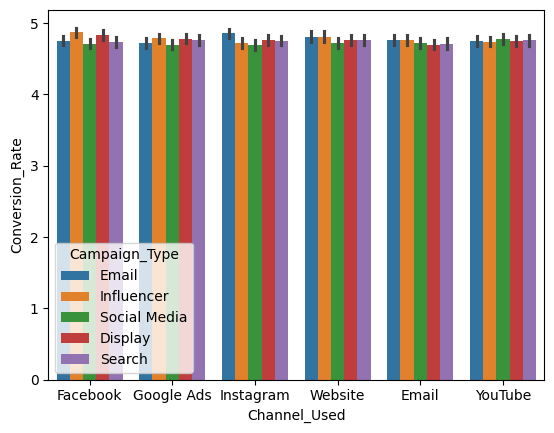

In [16]:
#Create a bar chart to visualize the average Conversion_Rate for different Channel_Used, categorized by Campaign_Type.
import seaborn as sns
sns.barplot(x='Channel_Used', y='Conversion_Rate', hue='Campaign_Type', data=df)


<Axes: xlabel='Campaign_Type', ylabel='Engagement_Score'>

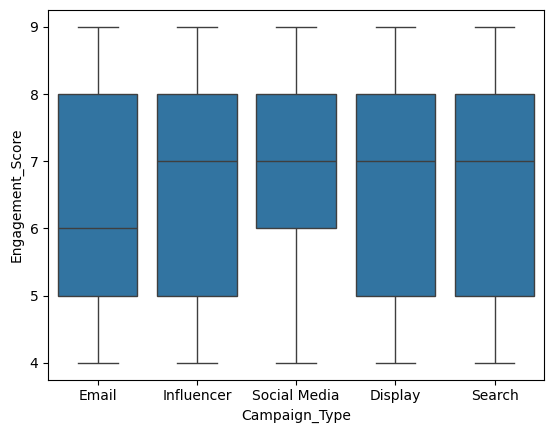

In [20]:
#Visualize the distribution of Engagement_Score across different Campaign_Type using a box plot.
sns.boxplot(x='Campaign_Type', y='Engagement_Score', data=df)


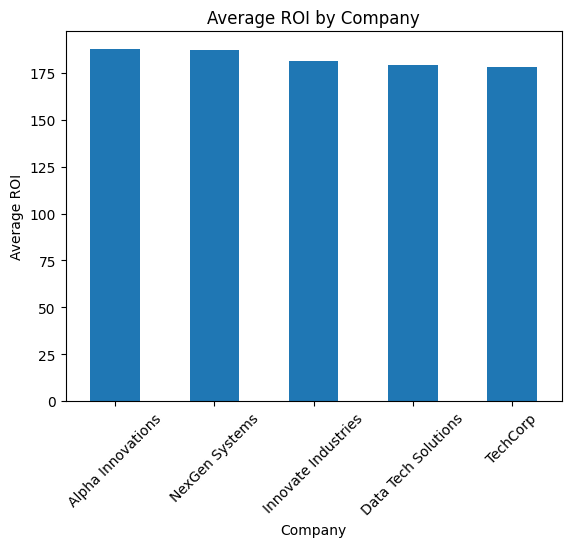

In [21]:
#Analyze the average ROI by Company using a bar chart to compare the profitability of campaigns conducted by different companies.
roi_by_company = df.groupby('Company')['ROI'].mean().sort_values(ascending=False)
roi_by_company.plot(kind='bar', title="Average ROI by Company")
plt.ylabel("Average ROI")
plt.xticks(rotation=45)
plt.show()


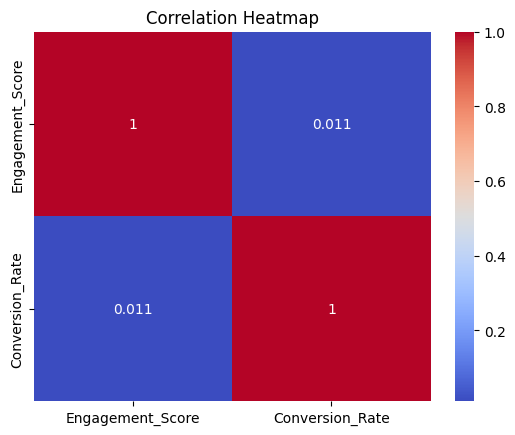

In [22]:
#Examine the correlation between Engagement_Score and Conversion_Rate using a heatmap.
correlation_matrix = df[['Engagement_Score', 'Conversion_Rate']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#Customer Segmentation:

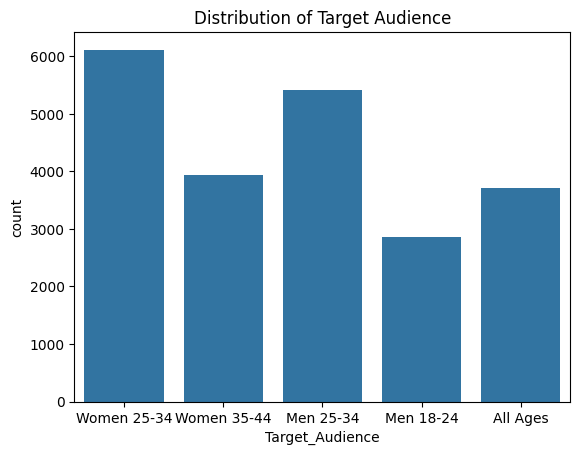

In [23]:
#Create a count plot to visualize the distribution of Target_Audience.
sns.countplot(x='Target_Audience', data=df)
plt.title('Distribution of Target Audience')
plt.show()

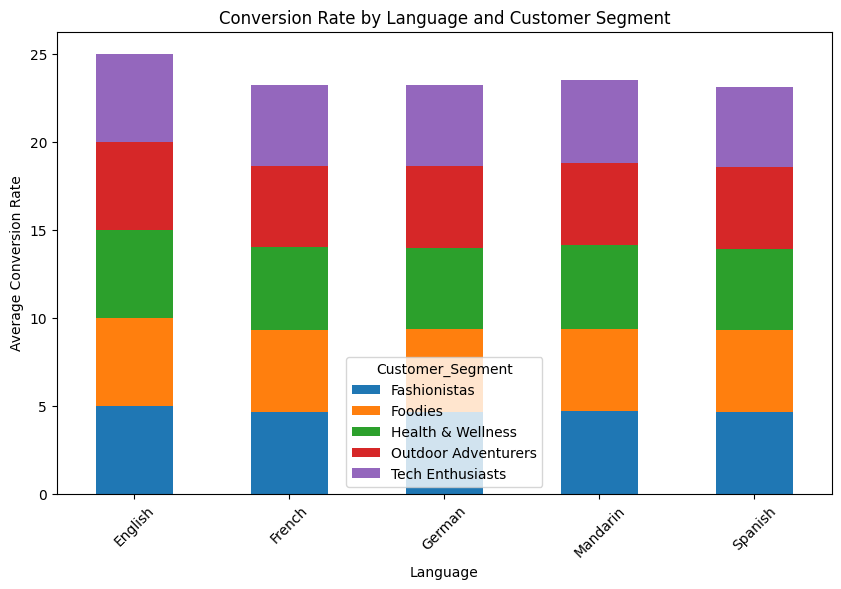

In [24]:
#Identify which Customer_Segment has the highest Conversion_Rate for each Language using a bar chart.
pivot = df.groupby(['Language', 'Customer_Segment'])['Conversion_Rate'].mean().unstack().fillna(0)
pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Conversion Rate by Language and Customer Segment")
plt.ylabel("Average Conversion Rate")
plt.xticks(rotation=45)
plt.show()

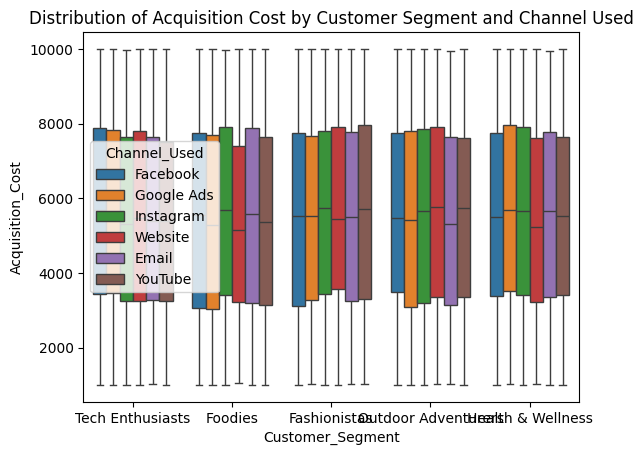

In [25]:
#Visualize the distribution of Acquisition_Cost across each Customer_Segment, categorized by Channel_Used, using a box plot.
sns.boxplot(x='Customer_Segment', y='Acquisition_Cost', hue='Channel_Used', data=df)
plt.title('Distribution of Acquisition Cost by Customer Segment and Channel Used')
plt.show()

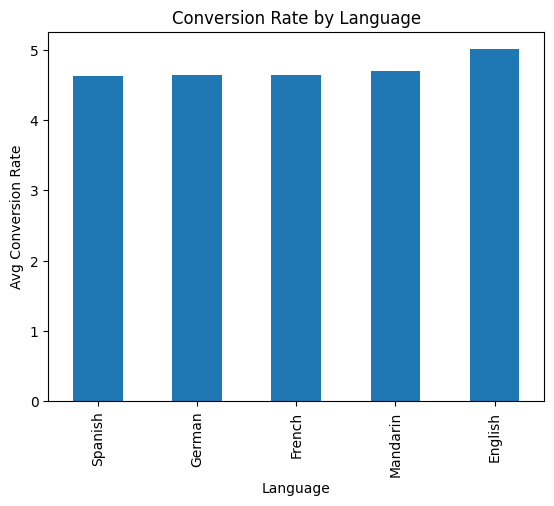

In [27]:
#Analyze average Conversion_Rate by Language using a bar chart to compare the effectiveness of campaigns conducted in different languages.
lang_conversion = df.groupby('Language')['Conversion_Rate'].mean().sort_values()
lang_conversion.plot(kind='bar', title="Conversion Rate by Language")
plt.ylabel("Avg Conversion Rate")
plt.show()

#Channel Effectiveness:

<Axes: xlabel='Channel_Used'>

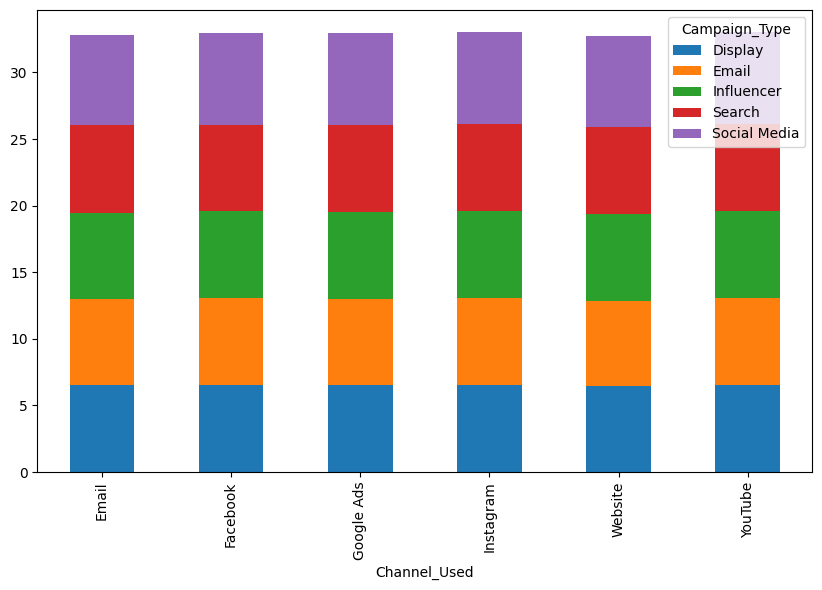

In [28]:
#Compare the Engagement_Score for different Channels_Used, segmented by Campaign_Type, using a bar chart.
pivot = df.groupby(['Channel_Used', 'Campaign_Type'])['Engagement_Score'].mean().unstack().fillna(0)
pivot.plot(kind='bar', stacked=True, figsize=(10, 6))

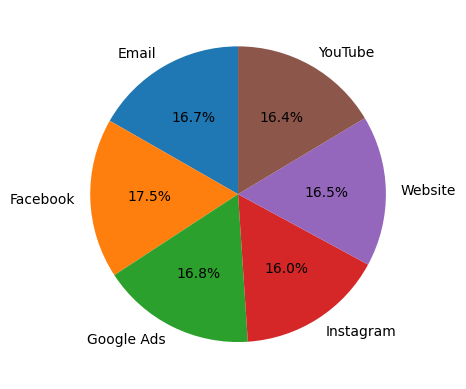

In [32]:
#Show the distribution of total ROI across different Channels_Used using a pie chart.
roi_by_channel = df.groupby('Channel_Used')['ROI'].sum()
plt.pie(roi_by_channel, labels=roi_by_channel.index, autopct='%1.1f%%', startangle=90)
plt.show()

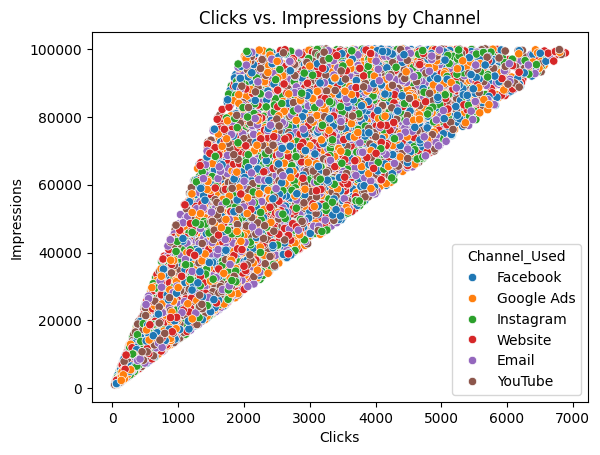

In [33]:
#Plot a scatter plot to show the relationship between Clicks and Impressions for each Channel_Used.
sns.scatterplot(x='Clicks', y='Impressions', hue='Channel_Used', data=df)
plt.title('Clicks vs. Impressions by Channel')
plt.show()

#Time-Based Analysis:

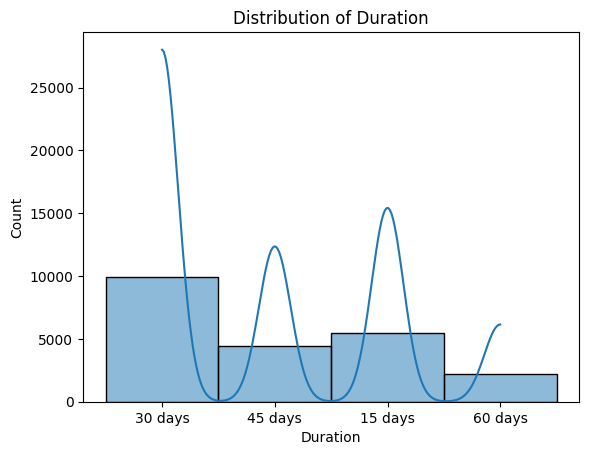

In [34]:
#Plot the distribution of Duration using a histogram.
sns.histplot(df['Duration'], bins=20, kde=True)
plt.title('Distribution of Duration')
plt.show()

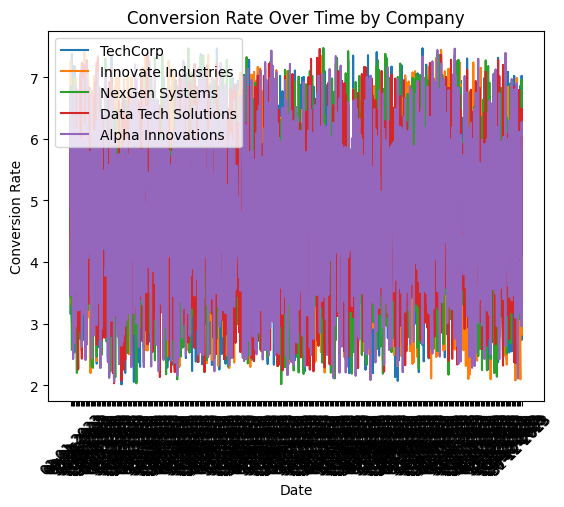

In [36]:
#Analyze how the overall Conversion_Rate has changed over Date for each Company using a line chart.
for company in df['Company'].unique():
    subset = df[df['Company'] == company]
    plt.plot(subset['Date'], subset['Conversion_Rate'], label=company)
plt.legend()
plt.title("Conversion Rate Over Time by Company")
plt.xlabel("Date")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)
plt.show()

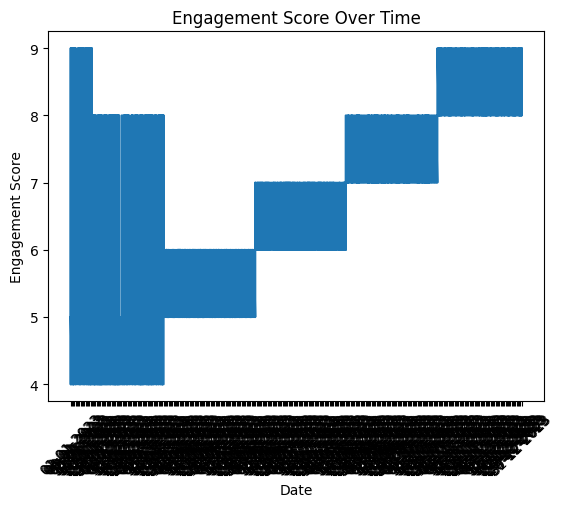

In [37]:
#Examine the trend of Engagement_Score over Date with a line chart.
plt.plot(df['Date'], df['Engagement_Score'])
plt.title("Engagement Score Over Time")
plt.xlabel("Date")
plt.ylabel("Engagement Score")
plt.xticks(rotation=45)
plt.show()

#Geographic Analysis:

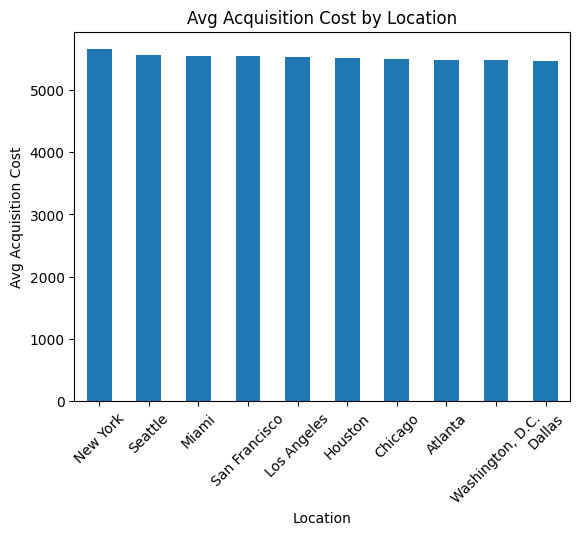

In [39]:
#Determine which location has the highest Acquisition_Cost using a bar chart.
df.groupby('Location')['Acquisition_Cost'].mean().sort_values(ascending=False).plot(kind='bar', title="Avg Acquisition Cost by Location")
plt.ylabel("Avg Acquisition Cost")
plt.xticks(rotation=45)
plt.show()

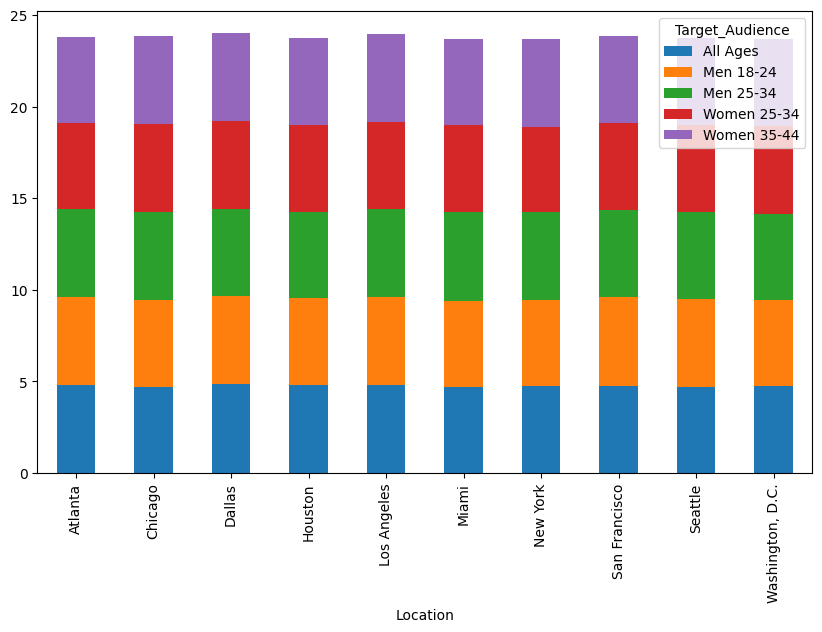

In [40]:
#Visualize the Conversion_Rate by different Location, categorized by Target_Audience, using a bar chart.
pivot = df.groupby(['Location', 'Target_Audience'])['Conversion_Rate'].mean().unstack().fillna(0)
pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.show()

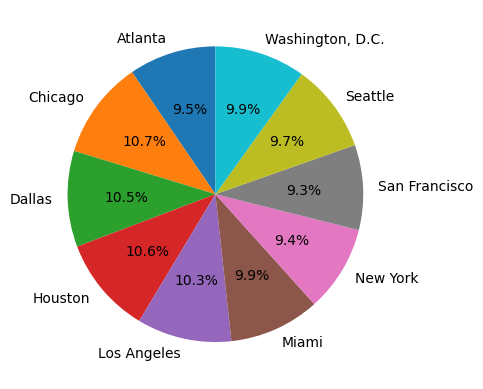

In [41]:
#Illustrate the proportion of ROI by Location using a pie chart.
roi_by_location = df.groupby('Location')['ROI'].sum()
plt.pie(roi_by_location, labels=roi_by_location.index, autopct='%1.1f%%', startangle=90)
plt.show()
